In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Intro_to_data_science/Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(file_path)
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
data['sentiment'] = (data['Rating']>3).astype(int)

In [ ]:
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


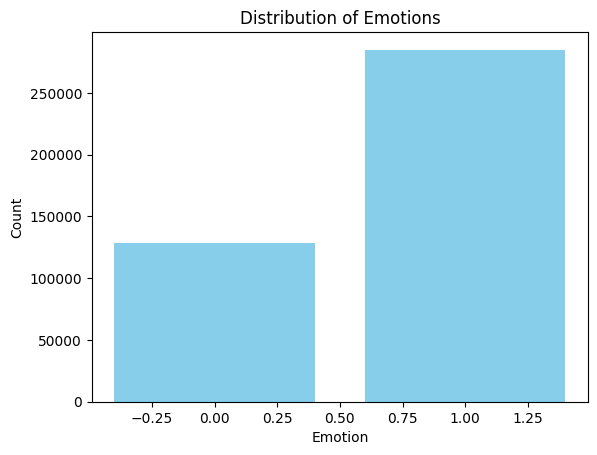

In [ ]:
import matplotlib.pyplot as plt
emotion_counts = data['sentiment'].value_counts()

# Plot the bar chart
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = data.dropna(subset=['Reviews', 'sentiment'])
# Split the data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # You can adjust max_features based on your data
X_train = tfidf_vectorizer.fit_transform(train_df['Reviews'])
X_test = tfidf_vectorizer.transform(test_df['Reviews'])

# Map sentiment labels to binary: 1 for positive, 0 for negative
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_result)

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68     25592
           1       0.84      0.91      0.88     57164

    accuracy                           0.82     82756
   macro avg       0.80      0.77      0.78     82756
weighted avg       0.82      0.82      0.82     82756



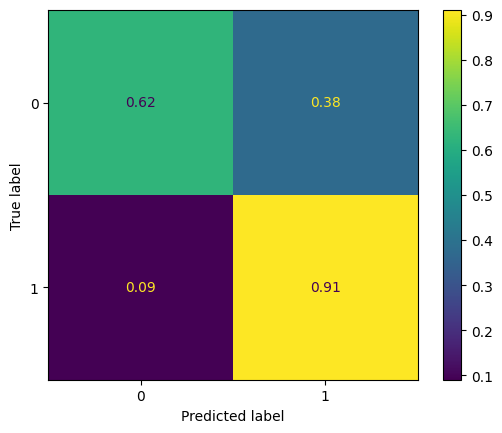

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, predictions)
import numpy as np

cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=classifier.classes_)
disp.plot()
plt.show()

Improving the model accuracy

In [ ]:
# Simple text preprocessing
data['Processed_Reviews'] = data['Reviews'].str.lower()
data['Processed_Reviews'] = data['Processed_Reviews'].str.replace('[^\w\s]', ' ')

<ipython-input-8-4df58a5eabb1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Processed_Reviews'] = data['Processed_Reviews'].str.replace('[^\w\s]', ' ')


In [ ]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train = tfidf_vectorizer.fit_transform(train_df['Processed_Reviews'])
X_test = tfidf_vectorizer.transform(test_df['Processed_Reviews'])

In [ ]:
y_train = train_df['sentiment']
y_test = test_df['sentiment']

In [ ]:
log_reg_classifier = LogisticRegression(C=0.5, max_iter=100)
log_reg_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [ ]:
predictions = log_reg_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)


print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_result)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86     25592
           1       0.93      0.95      0.94     57164

    accuracy                           0.91     82756
   macro avg       0.90      0.89      0.90     82756
weighted avg       0.91      0.91      0.91     82756

Accuracy: 0.91


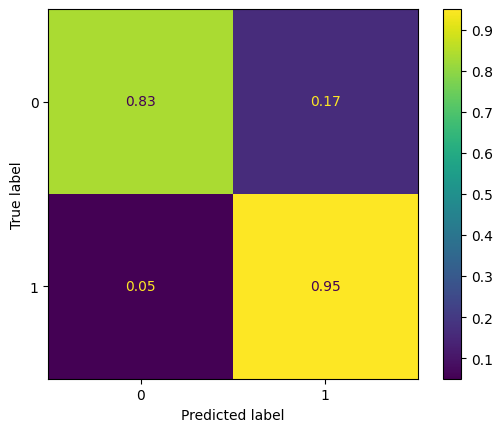

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=classifier.classes_)
disp.plot()
plt.show()